<a href="https://colab.research.google.com/github/MartinsOni/Marty-tic-tac-toe/blob/main/TestEnvGoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("spam_ham_dataset.csv")

In [28]:
data.head()

,Unnamed: 0,label,text,label_num,text_lenght,cleaned_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,subject hpl nom january 9 2001 attached file h...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,subject neon retreat ho ho ho wonderful time y...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,subject indian springs deal book teco pvr reve...


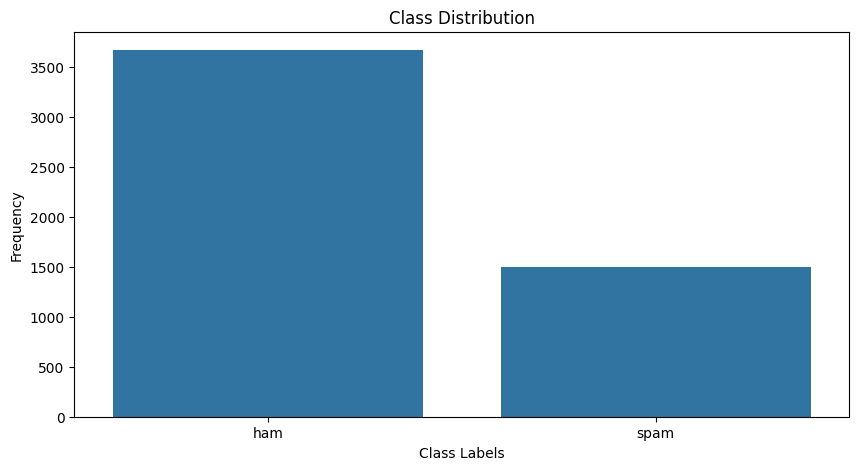

In [4]:
# Class Balance Analysis
class_counts = data['label'].value_counts()

# Plot the class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.ylabel('Frequency')
plt.xlabel('Class Labels')
plt.show()

In [9]:
from collections import Counter


In [5]:
data[data['label'] == "ham"]['text']

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
4       Subject: re : indian springs\r\nthis deal is t...
5       Subject: ehronline web address change\r\nthis ...
                              ...                        
5165    Subject: fw : crosstex energy , driscoll ranch...
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
Name: text, Length: 3672, dtype: object

In [6]:
def get_most_common_words(class_label, num_words, column_name, dataset):

    text = " ".join(message for message in dataset[dataset['label'] == class_label][column_name])

    words = text.split()
    return Counter(words).most_common(num_words)

In [13]:
get_most_common_words("spam", 40, "text", data)

[('.', 19489),
 (',', 11227),
 ('-', 7941),
 ('the', 7254),
 ('/', 5707),
 ('to', 5160),
 ('and', 4903),
 (':', 4612),
 ('of', 4490),
 ('a', 3787),
 ('in', 3129),
 ('=', 3091),
 ('you', 2794),
 ('for', 2523),
 ('!', 2458),
 ('this', 2283),
 ('is', 2256),
 ('your', 1946),
 ('?', 1928),
 ("'", 1762),
 ('$', 1666),
 (')', 1549),
 ('(', 1513),
 ('Subject:', 1499),
 ('with', 1470),
 ('that', 1348),
 ('s', 1315),
 ('|', 1309),
 ('be', 1303),
 ('or', 1301),
 ('on', 1259),
 ('3', 1239),
 ('_', 1218),
 ('as', 1199),
 ('are', 1167),
 ('i', 1138),
 ('we', 1137),
 ('%', 1105),
 ('it', 1088),
 ('not', 1042)]

In [14]:
data['text_lenght'] = data['text'].apply(len)

In [15]:
data.groupby("label")['text_lenght'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,3672.0,977.008170,1382.827493,18.0,231.75,530.0,1227.25,32258.0
spam,1499.0,1223.256171,1825.986210,11.0,283.00,576.0,1253.50,22073.0


In [16]:
data.head()

,Unnamed: 0,label,text,label_num,text_lenght
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [17]:
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def preprocess_text(text):
  text = text.lower()
  text = text.translate(str.maketrans("", "", string.punctuation))
  words = text.split()
  words = [word for word in words if word not in ENGLISH_STOP_WORDS]
  text = ' '.join(words)
  return text

In [20]:
data['text'].values[0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [21]:
preprocess_text(data['text'].values[0])

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminary flow data provided daren override pop s daily volume presently zero reflect daily activity obtain gas control change needed asap economics purposes'

In [22]:
data['cleaned_text'] = data['text'].apply(preprocess_text)

In [27]:
data.head()

,Unnamed: 0,label,text,label_num,text_lenght,cleaned_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,subject hpl nom january 9 2001 attached file h...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,subject neon retreat ho ho ho wonderful time y...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,subject indian springs deal book teco pvr reve...


In [24]:
spam_words = get_most_common_words("spam", 40, "cleaned_text", data)
ham_words = get_most_common_words("ham", 40, "cleaned_text", data)

In [25]:
spam_words

[('subject', 1657),
 ('s', 1316),
 ('3', 1239),
 ('com', 992),
 ('http', 983),
 ('2', 858),
 ('company', 728),
 ('1', 720),
 ('0', 698),
 ('e', 631),
 ('www', 587),
 ('00', 585),
 ('information', 520),
 ('font', 515),
 ('5', 510),
 ('td', 504),
 ('t', 502),
 ('4', 494),
 ('statements', 476),
 ('email', 474),
 ('price', 471),
 ('d', 469),
 ('7', 457),
 ('new', 432),
 ('nbsp', 418),
 ('p', 384),
 ('height', 362),
 ('time', 361),
 ('8', 321),
 ('99', 321),
 ('o', 315),
 ('free', 313),
 ('pills', 311),
 ('6', 307),
 ('size', 306),
 ('width', 306),
 ('stock', 299),
 ('2004', 299),
 ('10', 298),
 ('message', 297)]

In [26]:
ham_words

[('ect', 13897),
 ('hou', 7281),
 ('enron', 6555),
 ('subject', 6403),
 ('2000', 4308),
 ('gas', 2861),
 ('deal', 2789),
 ('com', 2717),
 ('meter', 2459),
 ('cc', 2359),
 ('pm', 2325),
 ('hpl', 2318),
 ('s', 2111),
 ('2001', 2024),
 ('1', 2023),
 ('daren', 1901),
 ('000', 1880),
 ('00', 1819),
 ('10', 1815),
 ('thanks', 1813),
 ('01', 1723),
 ('corp', 1710),
 ('3', 1683),
 ('d', 1658),
 ('2', 1521),
 ('know', 1438),
 ('mmbtu', 1349),
 ('e', 1338),
 ('11', 1311),
 ('j', 1300),
 ('forwarded', 1296),
 ('need', 1257),
 ('12', 1206),
 ('03', 1185),
 ('farmer', 1137),
 ('let', 1086),
 ('4', 1083),
 ('attached', 1083),
 ('5', 1055),
 ('xls', 1020)]